# Programmazione di Applicazioni Data Intensive: Progetto 

- Candidato: Fabrizio Margotta
- Dataset: [Malicious and Benign Websites](https://www.kaggle.com/xwolf12/malicious-and-benign-websites) by Christian Urcuqui

## Introduzione

## Analisi esplorativa

In [1]:
# setup e test librerie
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
import seaborn as sns
sns.set();
import sklearn

In [2]:
dtypes = {
    'CHARSET': 'category',
    'SERVER': 'category',
    'WHOIS_COUNTRY': 'category',
    'WHOIS_STATEPRO': 'category',
}

In [3]:
DS_URL = "https://gitlab.com/emrevoid/uni/dia/project/famar/-/raw/master/dataset.csv"
#https://stackoverflow.com/questions/51092889/receiving-http-error-403-forbidden-csv-download/51093473
response = requests.get(DS_URL)
file_object = io.StringIO(response.content.decode('utf-8'))

ds = pd.read_csv(file_object, header=0, index_col=0, sep=';', dtype=dtypes)
ds['WHOIS_REGDATE'] = pd.to_datetime(ds['WHOIS_REGDATE'], errors='coerce')
ds['WHOIS_UPDATED_DATE'] = pd.to_datetime(ds['WHOIS_UPDATED_DATE'], errors='coerce')
ds = ds.rename(columns={"Type": "malicious"})
ds.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
URL                                                          
M0_109           16                          7  iso-8859-1   
B0_2314          16                          6       UTF-8   
B0_911           16                          6    us-ascii   
B0_113           17                          6  ISO-8859-1   
B0_403           17                          6       UTF-8   

                        SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
URL                                                                           
M0_109                   nginx          263.00          None           None   
B0_2314          Apache/2.4.10        15087.00          None           None   
B0_911   Microsoft-HTTPAPI/2.0          324.00          None           None   
B0_113                   nginx          162.00            US             AK   
B0_403                    None       124140.00            US             TX   

               WHOIS_REGDATE   WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
URL                                                                            
M0_109   2015-10-10 18:21:00                  NaT                          7   
B0_2314                  NaT                  NaT                         17   
B0_911                   NaT                  NaT                          0   
B0_113   1997-07-10 04:00:00  2013-12-09 00:45:00                         31   
B0_403   1996-12-05 00:00:00  2017-11-04 00:00:00                         57   

         DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
URL                                                                        
M0_109                      0           2        700                   9   
B0_2314                     7           4       1230                  17   
B0_911                      0           0          0                   0   
B0_113                     22           3       3812                  39   
B0_403                      2           5       4278                  61   

         REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
URL                                                                            
M0_109                   10              1153               832            9   
B0_2314                  19              1265              1230           17   
B0_911                    0                 0                 0            0   
B0_113                   37             18784              4380           39   
B0_403                   62            129889              4586           61   

         DNS_QUERY_TIMES  malicious  
URL                                  
M0_109              2.00          1  
B0_2314             0.00          0  
B0_911              0.00          0  
B0_113              8.00          0  
B0_403              4.00          0

In [4]:
ds.shape

(1781, 20)

In [5]:
ds["malicious"].value_counts()

0    1565
1     216
Name: malicious, dtype: int64

In [6]:
ds["malicious"].value_counts(normalize=True)

0   0.88
1   0.12
Name: malicious, dtype: float64

In [7]:
pd.set_option('display.max_rows', None)
ds.groupby('malicious')['SERVER'].value_counts()

malicious  SERVER                                                                                                                                                                     
0          Apache                                                                                                                                                                         295
           None                                                                                                                                                                           175
           nginx                                                                                                                                                                          162
           Microsoft-HTTPAPI/2.0                                                                                                                                                          110
           cloudflare-nginx                              

In [8]:
ds['CHARSET'].unique()
ds['CHARSET']=np.where(ds['CHARSET'] == 'iso-8859-1', 'ISO-8859-1', ds['CHARSET'])
ds['CHARSET']=np.where(ds['CHARSET'] == 'ISO-8859', 'ISO-8859-1', ds['CHARSET'])
ds['CHARSET']=np.where(ds['CHARSET'] == 'utf-8', 'UTF-8', ds['CHARSET'])

In [9]:
ds['WHOIS_COUNTRY'].unique()
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == 'United Kingdom', 'UK', ds['WHOIS_COUNTRY'])
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == "[u'GB', u'UK']", 'UK', ds['WHOIS_COUNTRY'])
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == 'United Kingdom', 'UK', ds['WHOIS_COUNTRY'])
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == 'us', 'US', ds['WHOIS_COUNTRY'])
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == 'se', 'SE', ds['WHOIS_COUNTRY'])
ds['WHOIS_COUNTRY']=np.where(ds['WHOIS_COUNTRY'] == 'ru', 'RU', ds['WHOIS_COUNTRY'])

In [10]:
pd.set_option('display.max_rows', None)
ds.groupby('malicious')['CHARSET'].value_counts()

malicious  CHARSET     
0          UTF-8           903
           ISO-8859-1      504
           us-ascii        151
           None              6
           windows-1252      1
1          UTF-8           152
           ISO-8859-1       58
           us-ascii          4
           None              1
           windows-1251      1
Name: CHARSET, dtype: int64

In [11]:
pd.set_option('display.max_rows', None)
ds.groupby('malicious')['WHOIS_COUNTRY'].value_counts()

malicious  WHOIS_COUNTRY
0          US               1056
           None              241
           CA                 82
           AU                 35
           PA                 19
           GB                 15
           UK                 15
           JP                 11
           IN                  9
           FR                  8
           CN                  7
           CH                  6
           NL                  6
           AT                  4
           BS                  4
           PH                  4
           SE                  4
           BE                  3
           HK                  3
           KR                  3
           KY                  3
           SC                  3
           TR                  3
           Cyprus              2
           DE                  2
           IL                  2
           KG                  2
           NO                  2
           SI                  2
           AE     

In [12]:
pd.set_option('display.max_rows', None)
ds.groupby('malicious')['WHOIS_STATEPRO'].value_counts()

malicious  WHOIS_STATEPRO      
0          CA                      369
           None                    290
           NY                       75
           WA                       63
           FL                       60
           Arizona                  56
           California               45
           ON                       43
           NV                       30
           UT                       29
           CO                       23
           MA                       21
           PA                       20
           IL                       19
           PANAMA                   17
           MO                       15
           NJ                       15
           Ohio                     15
           Queensland               14
           New York                 11
           TX                       10
           VA                       10
           Quebec                    9
           Texas                     9
           DC                   

In [13]:
ds.describe()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count     1781.00                    1781.00          969.00   
mean        56.96                      11.11        11726.93   
std         27.56                       4.55        36391.81   
min         16.00                       5.00            0.00   
25%         39.00                       8.00          324.00   
50%         49.00                      10.00         1853.00   
75%         68.00                      13.00        11323.00   
max        249.00                      43.00       649263.00   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
count                    1781.00               1781.00     1781.00    1781.00   
mean                       16.26                  5.47        3.06    2982.34   
std                        40.50                 21.81        3.39   56050.57   
min                         0.00                  0.00        0.00       0.00   
25%                         0.00                  0.00        0.00       0.00   
50%                         7.00                  0.00        2.00     672.00   
75%                        22.00                  5.00        5.00    2328.00   
max                      1194.00                708.00       17.00 2362906.00   

       SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
count             1781.00             1781.00           1781.00   
mean                18.54               18.75          15892.55   
std                 41.63               46.40          69861.93   
min                  0.00                0.00              0.00   
25%                  0.00                0.00              0.00   
50%                  8.00                9.00            579.00   
75%                 26.00               25.00           9806.00   
max               1198.00             1284.00        2060012.00   

       REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  malicious  
count           1781.00      1781.00          1780.00    1781.00  
mean            3155.60        18.54             2.26       0.12  
std            56053.78        41.63             2.93       0.33  
min                0.00         0.00             0.00       0.00  
25%                0.00         0.00             0.00       0.00  
50%              735.00         8.00             0.00       0.00  
75%             2701.00        26.00             4.00       0.00  
max          2362906.00      1198.00            20.00       1.00

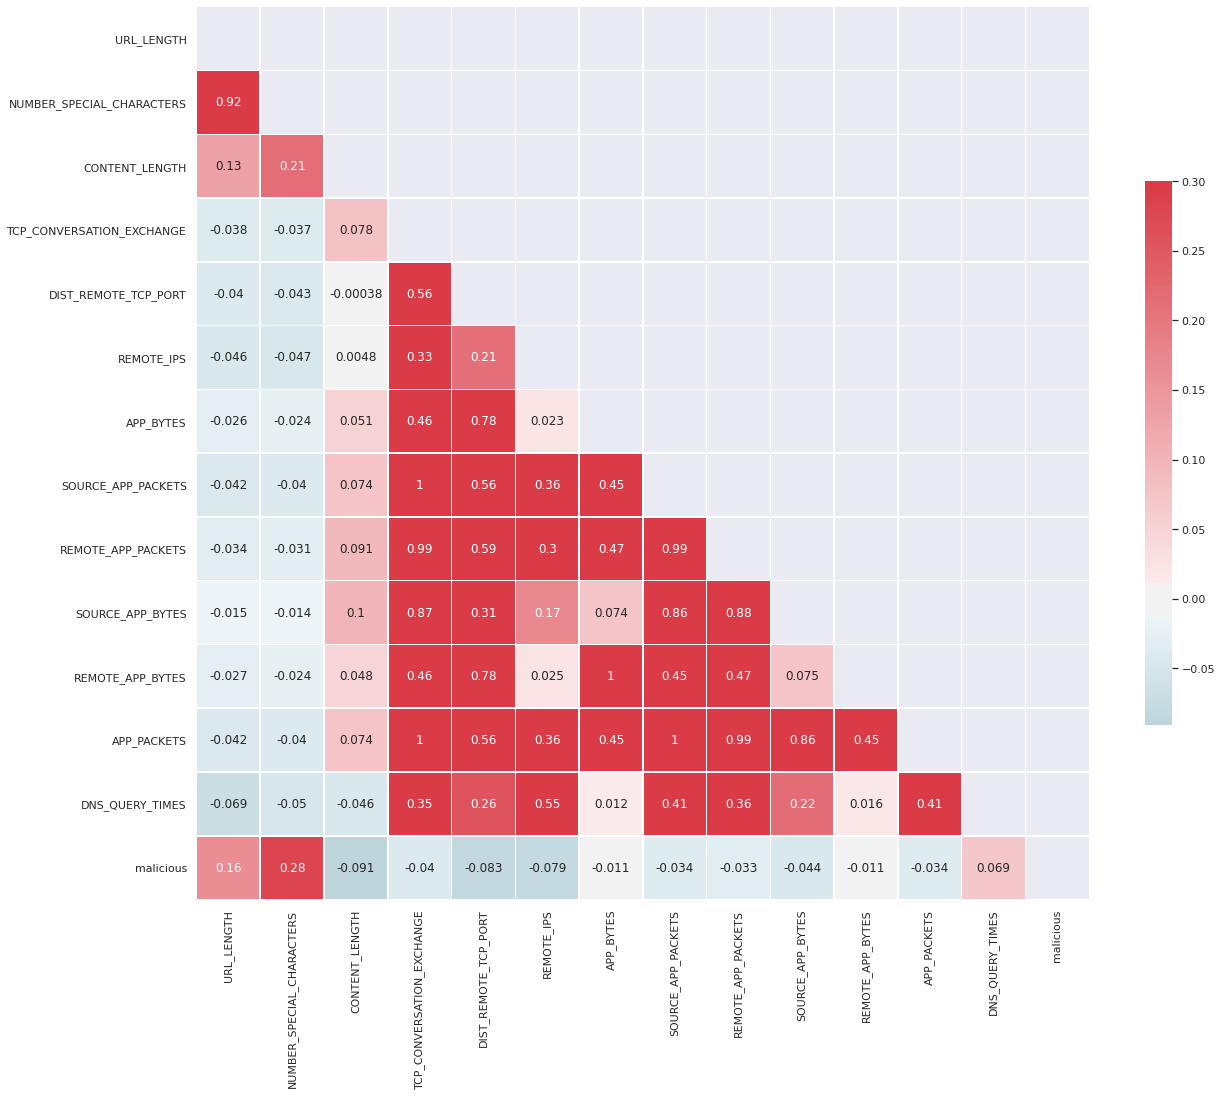

In [14]:
# Compute the correlation matrix
corr = ds.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [15]:
ds.nunique()

URL_LENGTH                   142
NUMBER_SPECIAL_CHARACTERS     31
CHARSET                        6
SERVER                       239
CONTENT_LENGTH               637
WHOIS_COUNTRY                 44
WHOIS_STATEPRO               182
WHOIS_REGDATE                888
WHOIS_UPDATED_DATE           593
TCP_CONVERSATION_EXCHANGE    103
DIST_REMOTE_TCP_PORT          66
REMOTE_IPS                    18
APP_BYTES                    825
SOURCE_APP_PACKETS           113
REMOTE_APP_PACKETS           116
SOURCE_APP_BYTES             885
REMOTE_APP_BYTES             822
APP_PACKETS                  113
DNS_QUERY_TIMES               10
malicious                      2
dtype: int64

In [16]:
ds['SERVER'].value_counts()[:15]

Apache                    386
nginx                     211
None                      175
Microsoft-HTTPAPI/2.0     113
cloudflare-nginx           94
Microsoft-IIS/7.5          51
GSE                        49
Server                     49
YouTubeFrontEnd            42
nginx/1.12.0               36
ATS                        30
Apache/2.2.15 (CentOS)     25
Apache-Coyote/1.1          20
Microsoft-IIS/8.5          15
Apache/2                   15
Name: SERVER, dtype: int64

Riduciamo la dimensionalità della variabile categorica `SERVER`:

In [17]:
ds['SERVER'] = np.where(ds['SERVER'].str.contains('Apache/'), 'Apache', ds['SERVER'])
ds['SERVER'] = np.where(ds['SERVER'].str.contains('nginx/'), 'nginx', ds['SERVER'])
ds['SERVER'] = np.where(ds['SERVER'].str.contains('Microsoft-'), 'Microsoft', ds['SERVER'])

### Binarizzazione delle feature categoriche

In [18]:
ds['SERVER'].value_counts()[:3]

Apache       623
nginx        337
Microsoft    198
Name: SERVER, dtype: int64

In [19]:
tmp = ds[ds['SERVER'].isin(ds.SERVER.value_counts()[3:].index)]
ds[ds['SERVER'].isin(ds.SERVER.value_counts()[3:].index)]

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS       CHARSET  \
URL                                                            
B0_403           17                          6         UTF-8   
B0_22            20                          7         UTF-8   
B0_161           22                          6         UTF-8   
B0_1412          23                          7    ISO-8859-1   
B0_2217          23                          6    ISO-8859-1   
B0_23            23                          6          None   
B0_241           23                          6         UTF-8   
B0_285           23                          6         UTF-8   
B0_465           23                          6         UTF-8   
B0_108           24                          6         UTF-8   
B0_126           24                          6    ISO-8859-1   
B0_2301          24                          6         UTF-8   
B0_2313          24                          6         UTF-8   
B0_2224          25                          6         UTF-8   
B0_577           25                          6         UTF-8   
B0_1205          26                          7         UTF-8   
B0_179           26                          6          None   
B0_2293          26                          6         UTF-8   
B0_660           26                          6         UTF-8   
B0_859           26                          6      us-ascii   
B0_883           26                          6         UTF-8   
B0_2085          27                          6         UTF-8   
B0_1038          28                          6    ISO-8859-1   
B0_1413          28                          7    ISO-8859-1   
B0_2061          28                          7      us-ascii   
B0_2182          28                          7    ISO-8859-1   
B0_438           28                          7         UTF-8   
B0_835           28                          6         UTF-8   
B0_96            28                          6         UTF-8   
B0_1051          29                          6          None   
B0_2166          29                          6      us-ascii   
B0_44            29                          6    ISO-8859-1   
B0_499           29                          8         UTF-8   
B0_626           29                          8         UTF-8   
B0_978           29                          6         UTF-8   
B0_169           30                          6    ISO-8859-1   
B0_2097          30                          6    ISO-8859-1   
B0_560           30                          6         UTF-8   
B0_639           30                          6    ISO-8859-1   
B0_711           30                          7         UTF-8   
B0_824           30                          8         UTF-8   
B0_891           30                          6         UTF-8   
B0_1028          31                          8         UTF-8   
B0_140           31                          6    ISO-8859-1   
B0_2278          31                          7         UTF-8   
B0_761           31                          7    ISO-8859-1   
B0_1175          32                          8         UTF-8   
B0_1181          32                          6    ISO-8859-1   
B0_1222          32                          8         UTF-8   
B0_128           32                          9         UTF-8   
B0_165           32                          7    ISO-8859-1   
B0_2015          32                          6         UTF-8   
B0_400           32                          8         UTF-8   
B0_437           32                          8         UTF-8   
B0_491           32                          7         UTF-8   
B0_507           32                          7         UTF-8   
B0_937           32                          7      us-ascii   
B0_1068          33                          7         UTF-8   
B0_1101          33                          8         UTF-8   
B0_1141          33                          8         UTF-8   
B0_1190          33                      

In [20]:
tmp['malicious'].value_counts()

0    611
1     12
Name: malicious, dtype: int64

In [21]:
tmp.shape

(623, 20)

In [22]:
tmp2 = ds[ds['SERVER'].isin(ds.SERVER.value_counts()[:3].index)] # OK!
tmp2['malicious'].value_counts()

0    954
1    204
Name: malicious, dtype: int64

In [23]:
tmp2.shape

(1158, 20)

In [24]:
ds = ds.drop(ds[ds['SERVER'].isin(ds.SERVER.value_counts()[3:].index)].index)
ds

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS       CHARSET     SERVER  \
URL                                                                       
M0_109           16                          7    ISO-8859-1      nginx   
B0_2314          16                          6         UTF-8     Apache   
B0_911           16                          6      us-ascii  Microsoft   
B0_113           17                          6    ISO-8859-1      nginx   
B0_2064          18                          7         UTF-8      nginx   
B0_462           18                          6    ISO-8859-1     Apache   
B0_1128          19                          6      us-ascii  Microsoft   
M2_17            20                          5         UTF-8      nginx   
M3_75            20                          5         UTF-8      nginx   
B0_1013          20                          6         UTF-8     Apache   
B0_1102          20                          6      us-ascii  Microsoft   
B0_482           20                          6    ISO-8859-1      nginx   
B0_869           20                          7    ISO-8859-1     Apache   
M0_71            21                          7    ISO-8859-1     Apache   
M0_97            21                          7    ISO-8859-1      nginx   
B0_2303          21                          6      us-ascii  Microsoft   
B0_584           21                          6         UTF-8      nginx   
M0_69            22                          7      us-ascii  Microsoft   
B0_2122          22                          6    ISO-8859-1      nginx   
B0_2176          22                          6    ISO-8859-1     Apache   
B0_569           22                          7         UTF-8     Apache   
B0_601           22                          6         UTF-8      nginx   
B0_884           22                          6    ISO-8859-1     Apache   
B0_905           22                          6    ISO-8859-1      nginx   
B0_916           22                          6         UTF-8      nginx   
B0_102           23                          6         UTF-8     Apache   
B0_1130          23                          6    ISO-8859-1     Apache   
B0_1185          23                          6      us-ascii  Microsoft   
B0_1369          23                          6         UTF-8      nginx   
B0_2240          23                          7         UTF-8      nginx   
B0_599           23                          6    ISO-8859-1      nginx   
B0_614           23                          6    ISO-8859-1     Apache   
B0_622           23                          6    ISO-8859-1     Apache   
B0_790           23                          6      us-ascii  Microsoft   
M0_175           24                          8    ISO-8859-1      nginx   
M0_89            24                          9    ISO-8859-1     Apache   
B0_171           24                          7         UTF-8      nginx   
B0_2315          24                          6      us-ascii  Microsoft   
B0_282           24                          8    ISO-8859-1     Apache   
B0_321           24                          6         UTF-8      nginx   
B0_326           24                          7    ISO-8859-1     Apache   
B0_483           24                          7         UTF-8      nginx   
B0_543           24                          6    ISO-8859-1     Apache   
B0_656           24                          6         UTF-8     Apache   
B0_1163          25                          6         UTF-8     Apache   
B0_1308          25                          7         UTF-8      nginx   
B0_1347          25                          6         UTF-8      nginx   
B0_2127          25                          6      us-ascii  Microsoft   
B0_468           25                          6         UTF-8     Apache   
B0_568           25                          6         UTF-8      nginx   
B0_704           25                          6    ISO-8859-1     Apache   
B0_781           25               

In [25]:
ds['malicious'].value_counts()

0    954
1    204
Name: malicious, dtype: int64

In [26]:
dtype_categories = ['SERVER']
ds = pd.get_dummies(ds, columns=dtype_categories, prefix=dtype_categories)

Rimozione di valori fuori "scala" che non permettono di visualizzare correttamente alcuni scatterplot (poiché "appiattiscono" la distribuzione).

In [113]:
pd.set_option('display.max_rows', 20)
ds = ds.drop(ds.index[ds.APP_BYTES > 40000])
ds.sort_values('APP_BYTES')['APP_BYTES']

URL
M4_13          0
B0_822         0
B0_1122        0
B0_1245        0
B0_1286        0
           ...  
B0_682     15162
B0_304     18084
M0_121     20074
B0_222     23383
B0_481     26631
Name: APP_BYTES, Length: 1157, dtype: int64

In [129]:
ds['CHARSET'].value_counts()[:3]

UTF-8         622
ISO-8859-1    398
us-ascii      132
Name: CHARSET, dtype: int64

In [125]:
tmp = ds[ds['CHARSET'].isin(ds.CHARSET.value_counts()[:3].index)]
ds[ds['CHARSET'].isin(ds.CHARSET.value_counts()[:3].index)]

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  CONTENT_LENGTH  \
URL                                                                          
M0_109           16                          7  ISO-8859-1          263.00   
B0_2314          16                          6       UTF-8        15087.00   
B0_911           16                          6    us-ascii          324.00   
B0_113           17                          6  ISO-8859-1          162.00   
B0_2064          18                          7       UTF-8        10122.40   
B0_462           18                          6  ISO-8859-1          345.00   
B0_1128          19                          6    us-ascii          324.00   
M2_17            20                          5       UTF-8        10122.40   
M3_75            20                          5       UTF-8        10122.40   
B0_1013          20                          6       UTF-8        10122.40   
B0_1102          20                          6    us-ascii          324.00   
B0_482           20                          6  ISO-8859-1         3692.00   
B0_869           20                          7  ISO-8859-1        13054.00   
M0_71            21                          7  ISO-8859-1          957.00   
M0_97            21                          7  ISO-8859-1          686.00   
B0_2303          21                          6    us-ascii          324.00   
B0_584           21                          6       UTF-8        15025.00   
M0_69            22                          7    us-ascii          324.00   
B0_2122          22                          6  ISO-8859-1          318.00   
B0_2176          22                          6  ISO-8859-1          224.00   
B0_569           22                          7       UTF-8         4421.00   
B0_601           22                          6       UTF-8        10122.40   
B0_884           22                          6  ISO-8859-1          441.00   
B0_905           22                          6  ISO-8859-1        10122.40   
B0_916           22                          6       UTF-8         6671.00   
B0_102           23                          6       UTF-8        10122.40   
B0_1130          23                          6  ISO-8859-1          434.00   
B0_1185          23                          6    us-ascii          324.00   
B0_1369          23                          6       UTF-8        13001.00   
B0_2240          23                          7       UTF-8        10122.40   
B0_599           23                          6  ISO-8859-1        10122.40   
B0_614           23                          6  ISO-8859-1          240.00   
B0_622           23                          6  ISO-8859-1         3985.00   
B0_790           23                          6    us-ascii          324.00   
M0_175           24                          8  ISO-8859-1         6173.00   
M0_89            24                          9  ISO-8859-1          319.00   
B0_171           24                          7       UTF-8        10122.40   
B0_2315          24                          6    us-ascii          324.00   
B0_282           24                          8  ISO-8859-1          224.00   
B0_321           24                          6       UTF-8        10122.40   
B0_326           24                          7  ISO-8859-1          318.00   
B0_483           24                          7       UTF-8        10122.40   
B0_543           24                          6  ISO-8859-1          345.00   
B0_656           24                          6       UTF-8          756.00   
B0_1163          25                          6       UTF-8        10122.40   
B0_1308          25                          7       UTF-8        10122.40   
B0_1347          25                          6       UTF-8        14839.00   
B0_2127          25                          6    us-ascii          324.00   
B0_468           25                          6       UTF-8        10122.40   
B0_568           25            

In [130]:
ds = ds.drop(ds[ds['CHARSET'].isin(ds.CHARSET.value_counts()[3:].index)].index)
dtype_categ_charset = ['CHARSET']
ds = pd.get_dummies(ds, columns=dtype_categ_charset, prefix=dtype_categ_charset)

In [131]:
ds

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH WHOIS_COUNTRY  \
URL                                                                            
M0_109           16                          7          263.00          None   
B0_2314          16                          6        15087.00          None   
B0_911           16                          6          324.00          None   
B0_113           17                          6          162.00            US   
B0_2064          18                          7        10122.40            SC   
B0_462           18                          6          345.00            US   
B0_1128          19                          6          324.00            US   
M2_17            20                          5        10122.40          None   
M3_75            20                          5        10122.40          None   
B0_1013          20                          6        10122.40            US   
B0_1102          20                          6          324.00            US   
B0_482           20                          6         3692.00          None   
B0_869           20                          7        13054.00          None   
M0_71            21                          7          957.00            UK   
M0_97            21                          7          686.00            RU   
B0_2303          21                          6          324.00          None   
B0_584           21                          6        15025.00          None   
M0_69            22                          7          324.00            US   
B0_2122          22                          6          318.00            US   
B0_2176          22                          6          224.00          None   
B0_569           22                          7         4421.00            AU   
B0_601           22                          6        10122.40            US   
B0_884           22                          6          441.00            US   
B0_905           22                          6        10122.40            US   
B0_916           22                          6         6671.00            CA   
B0_102           23                          6        10122.40            US   
B0_1130          23                          6          434.00            PA   
B0_1185          23                          6          324.00            SE   
B0_1369          23                          6        13001.00          None   
B0_2240          23                          7        10122.40          None   
B0_599           23                          6        10122.40            IN   
B0_614           23                          6          240.00            US   
B0_622           23                          6         3985.00            CA   
B0_790           23                          6          324.00          None   
M0_175           24                          8         6173.00          None   
M0_89            24                          9          319.00            IN   
B0_171           24                          7        10122.40            US   
B0_2315          24                          6          324.00            CA   
B0_282           24                          8          224.00            US   
B0_321           24                          6        10122.40            CA   
B0_326           24                          7          318.00          None   
B0_483           24                          7        10122.40          None   
B0_543           24                          6          345.00            US   
B0_656           24                          6          756.00            PA   
B0_1163          25                          6        10122.40            CA   
B0_1308          25                          7        10122.40            US   
B0_1347          25                          6        14839.00            US   
B0_2127          25                          6          324.00            US   
B0_468   

In [28]:
features = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'APP_BYTES']

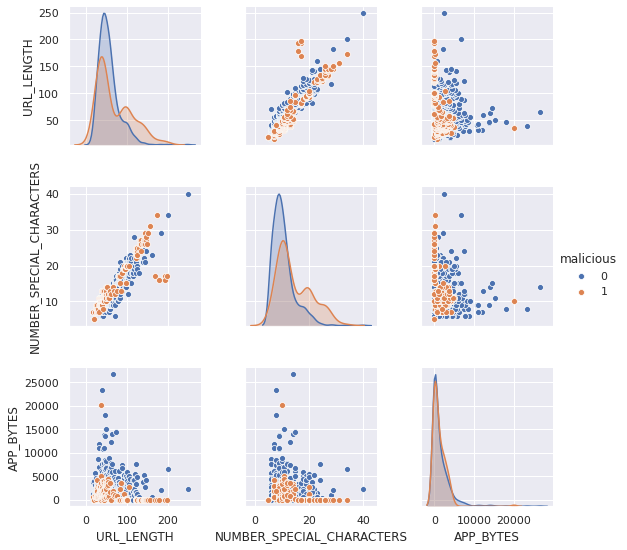

In [30]:
sns.pairplot(data=ds, hue="malicious", vars=features);

## Preparazione del dataset

### Gestione di valori nulli

Verifichiamo che nel dataset siano presenti valori nulli:

In [143]:
pd.set_option('display.max_rows', None)
ds.isna().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
malicious                    0
SERVER_Apache                0
SERVER_Microsoft             0
SERVER_nginx                 0
CHARSET_ISO-8859-1           0
CHARSET_UTF-8                0
CHARSET_us-ascii             0
dtype: int64

Usiamo il metodo `.fillna()`:
- per le feature numeriche sostituiamo i valori nulli con le medie

In [144]:
ds['CONTENT_LENGTH'].fillna(ds['CONTENT_LENGTH'].mean(), inplace=True)
ds['DNS_QUERY_TIMES'].fillna(ds['DNS_QUERY_TIMES'].mean(), inplace=True)

- per le feature temporali (`WHOIS_REGDATE` e `WHOIS_UPDATED_DATE`) usiamo i parametri `ffill` o `bfill`

In [145]:
ds['WHOIS_REGDATE'].fillna(method="ffill", inplace=True)
ds['WHOIS_UPDATED_DATE'].fillna(method="ffill", inplace=True)
ds['WHOIS_UPDATED_DATE'].fillna(method="bfill", inplace=True)

Verifichiamo di aver risolto il problema dei valori nulli:

In [146]:
ds.isna().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
malicious                    0
SERVER_Apache                0
SERVER_Microsoft             0
SERVER_nginx                 0
CHARSET_ISO-8859-1           0
CHARSET_UTF-8                0
CHARSET_us-ascii             0
dtype: int64

In [148]:
# X = ds[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS','DNS_QUERY_TIMES']]
X = ds.drop(['WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'malicious'], axis=1)
y = ds['malicious']

### Risoluzione problema classi sbilanciate

In [149]:
ds.shape

(1152, 24)

In [150]:
ds["malicious"].value_counts()

0    950
1    202
Name: malicious, dtype: int64

In [151]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 950), (1, 950)]


In [152]:
sns.set();
ds_oversampled = pd.concat([X_resampled, y_resampled], axis=1)

In [153]:
ds.shape

(1152, 24)

In [154]:
ds_oversampled["malicious"].value_counts()

1    950
0    950
Name: malicious, dtype: int64

In [155]:
ds_oversampled["malicious"].value_counts(normalize=True)

1   0.50
0   0.50
Name: malicious, dtype: float64

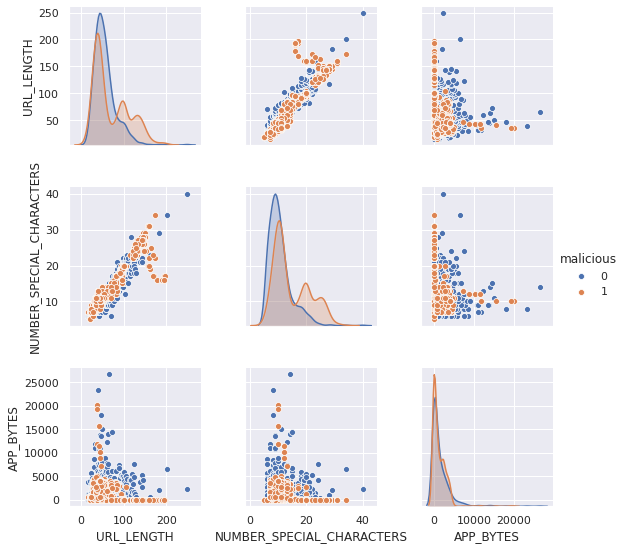

In [156]:
sns.pairplot(data=ds_oversampled, hue="malicious", vars=features);

## Classificazione

Separazione del dataset:

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=1/3,
    random_state=42,
)

Stratified K fold: preparazione dell'oggetto:

In [158]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(3, shuffle=True, random_state=42)
for train, val in skf.split(X_train, y_train):
    print(y_train.iloc[val].value_counts())

0    214
1    208
Name: malicious, dtype: int64
0    214
1    208
Name: malicious, dtype: int64
0    214
1    208
Name: malicious, dtype: int64


### Perceptron

Perceptron in pipeline con grid search su Standardizzazione, feature polinomiali (gradi da 1 a 5) e regolarizzazione in un intervallo con 5 valori da 10^-2 a 10^2.

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [160]:
#    {
#        "std" : scale
#    },
#    {
#        "std" : scale,
#        "poly": polynomial,
#        "poly__degree": polynomial_degree
#    },
#    {
#        "std" : scale,
#        "perceptron__penalty": ["l2", "l1", "elasticnet"],
#        "perceptron__alpha": np.logspace(-2, 2, 5),
#        "poly": polynomial,
#        "poly__degree": polynomial_degree
#    },
#        ("poly", None),
# polynomial_degree = [i for i in range(1, 6)]
# polynomial = [PolynomialFeatures(include_bias=False)]

In [ ]:
scale = [None, StandardScaler()]
polynomial = [PolynomialFeatures(include_bias=False)]
grid = [
    {
        "std" : scale,
        "perceptron__penalty": ["l2", "l1", "elasticnet"],
        "perceptron__alpha": np.logspace(-2, 2, 5)
    },
]

# Perceptron with standard scaler
model_perceptron = Pipeline([
    ('std', None),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ('perceptron', Perceptron(random_state=42))
])

gs = GridSearchCV(model_perceptron, grid, cv=skf)
gs.fit(X_train, y_train)

print('Accuracy on train {:.2f}%'.format(gs.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(gs.score(X_val, y_val)*100))
print(gs.best_params_)

In [72]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
39            3.48          0.61             0.01            0.00   
37            0.27          0.08             0.00            0.00   
41           10.70          5.68             0.04            0.00   
59            3.82          1.23             0.01            0.00   
35            0.02          0.00             0.00            0.00   
57            0.22          0.04             0.00            0.00   
33            0.01          0.00             0.00            0.00   
31            0.00          0.00             0.00            0.00   
61           26.44         21.85             0.04            0.00   
55            0.02          0.01             0.00            0.00   
87            0.16          0.03             0.00            0.00   
45            0.02          0.00             0.01            0.00   
65            0.02          0.00             0.01            0.01   
67            0.07          0.01             0.01            0.00   
47            0.03          0.00             0.01            0.00   
69            0.24          0.03             0.01            0.00   
49            0.12          0.01             0.01            0.00   
91           18.61         20.66             0.04            0.00   
1             0.01          0.00             0.00            0.00   
63            0.01          0.00             0.00            0.00   
43            0.01          0.00             0.00            0.00   
5             0.01          0.00             0.00            0.00   
85            0.02          0.00             0.00            0.00   
99            0.30          0.04             0.01            0.00   
79            0.13          0.01             0.01            0.00   
121           2.20          0.65             0.04            0.00   
53            0.01          0.00             0.00            0.00   
3             0.01          0.00             0.00            0.00   
77            0.04          0.01             0.01            0.00   
97            0.10          0.02             0.00            0.00   
151           1.27          0.22             0.04            0.00   
75            0.02          0.00             0.00            0.00   
95            0.03          0.01             0.00            0.00   
71            0.85          0.10             0.04            0.00   
51            0.34          0.03             0.04            0.00   
89            1.47          1.03             0.01            0.00   
62            0.01          0.00             0.00            0.00   
42            0.01          0.00             0.00            0.00   
0             0.00          0.00             0.00            0.00   
4             0.00          0.00             0.00            0.00   
73            0.01          0.00             0.00            0.00   
93            0.01          0.00             0.00            0.00   
7             0.01          0.00             0.00            0.00   
11            0.01          0.00             0.00            0.00   
117           0.12          0.03             0.00            0.00   
8             0.00          0.00             0.00            0.00   
82            0.01          0.00             0.00            0.00   
14            0.00          0.00             0.00            0.00   
112           0.01          0.00             0.00            0.00   
9             0.01          0.00             0.00            0.00   
83            0.01          0.00             0.00            0.00   
81            0.37          0.02             0.04            0.00   
101           0.97          0.07             0.04            0.00   
119           0.32          0.08             0.01            0.00   
46            0.04          0.01             0.01            0.00   
66            0.08          0.02             0.01            0.00   
147           0.10          0.01             0.00            0.00   
74 

Addestriamo lo stesso modello sui DataFrame contenenti le classi sbilanciate:

In [133]:
X_train_unb, X_val_unb, y_train_unb, y_val_unb = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42,
)

In [134]:
# Perceptron with standard scaler
model_perceptron_unb = Pipeline([
    ('std', None),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ('perceptron', Perceptron(random_state=42))
])

gs_unb = GridSearchCV(model_perceptron_unb, grid, cv=skf)
gs_unb.fit(X_train_unb, y_train_unb);

In [135]:
print('Accuracy on train {:.2f}%'.format(gs_unb.score(X_train_unb, y_train_unb)*100))
print('Accuracy on val {:.2f}%'.format(gs_unb.score(X_val_unb, y_val_unb)*100))
print(gs_unb.best_params_)

Accuracy on train 81.71%
Accuracy on val 82.64%
{'perceptron__alpha': 0.01, 'perceptron__penalty': 'l1', 'std': StandardScaler()}


#### Matrice di confusione

Calcoliamo la matrice di confusione sia per il DataSet originale con classi sbilanciate che con quello in cui le classi sono state bilanciate tramite SMOTE.

<Figure size 288x216 with 0 Axes>

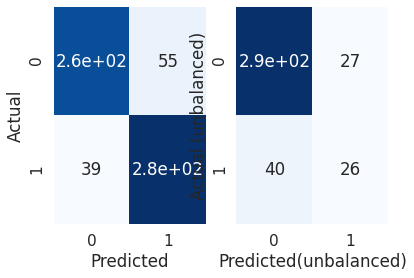

In [136]:
# https://www.kaggle.com/agungor2/various-confusion-matrix-plots#1.-Seaborn-Heatmap-
from sklearn.metrics import confusion_matrix
y_pred = gs.predict(X_val)
data = confusion_matrix(y_val, y_pred)

df_cm = pd.DataFrame(data, columns=np.unique(y_train), index = np.unique(y_train))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,3));
sns.set(font_scale=1.4); #for label size
#sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

y_pred_unb = gs_unb.predict(X_val_unb)
data_unb = confusion_matrix(y_val_unb, y_pred_unb)
df_cm_unb = pd.DataFrame(data_unb, columns=np.unique(y_train_unb), index = np.unique(y_train_unb))

# https://stackoverflow.com/questions/42712304/seaborn-heatmap-subplots-keep-axis-ratio-consistent
f,(ax1,ax2) = plt.subplots(1,2);
g1 = sns.heatmap(df_cm, cmap="Blues", annot=True, cbar=False, ax=ax1);
g1.set_ylabel('Actual');
g1.set_xlabel('Predicted');
g2 = sns.heatmap(df_cm_unb, cmap="Blues", annot=True, cbar=False, ax=ax2);
g2.set_ylabel('Actual (unbalanced)');
g2.set_xlabel('Predicted(unbalanced)');

#### Precision e recall

In [137]:
from sklearn.metrics import classification_report

Balanced:

In [138]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       312
           1       0.84      0.88      0.86       324

    accuracy                           0.85       636
   macro avg       0.85      0.85      0.85       636
weighted avg       0.85      0.85      0.85       636



Unbalanced:

In [139]:
print(classification_report(y_val_unb, y_pred_unb))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       320
           1       0.49      0.39      0.44        66

    accuracy                           0.83       386
   macro avg       0.69      0.65      0.67       386
weighted avg       0.81      0.83      0.82       386



### Regressione logistica

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [141]:
#    {
#        "std" : scale,
#        "poly": polynomial,
#        "poly__degree": polynomial_degree
#    },
#    {
#        "std" : scale,
#        "logreg__penalty": ["l1"],
#        "logreg__C": np.logspace(-2, 2, 5),
#        "poly": polynomial,
#        "poly__degree": polynomial_degree
#    },
# polynomial = [PolynomialFeatures(include_bias=False)]
# polynomial_degree = [i for i in range(1, 6)]
#     ('poly', None),

In [65]:
scale = [None, StandardScaler()]
grid = [
    {
        "std" : scale,
        "logreg__penalty": ["l1"],
        "logreg__C": np.logspace(-2, 2, 5)
    },
]

# Perceptron with standard scaler
model_logreg = Pipeline([
    ('std', None),
    ('logreg', LogisticRegression(solver="saga", dual=False, random_state=42, max_iter=10000))
])

gs_logreg = GridSearchCV(model_logreg, grid, cv=skf)
gs_logreg.fit(X_train, y_train)

print('Accuracy on train {:.2f}%'.format(gs_logreg.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(gs_logreg.score(X_val, y_val)*100))
print(gs_logreg.best_params_)

Accuracy on train 87.48%
Accuracy on val 88.05%
{'logreg__C': 100.0, 'logreg__penalty': 'l1', 'std': StandardScaler()}


In [82]:
y_pred_logreg = gs_logreg.predict(X_val)
print(classification_report(y_val, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       312
           1       0.89      0.88      0.88       324

    accuracy                           0.88       636
   macro avg       0.88      0.88      0.88       636
weighted avg       0.88      0.88      0.88       636



### SVM

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [111]:
scale = [None, StandardScaler()]
grid = [
    {
        "std" : scale,
        "svm__C": np.logspace(-3, 3, 3)
    },
]

# Perceptron with standard scaler
model_svm = Pipeline([
    ('std', None),
    ('svm', SVC())
])

gs_svm = GridSearchCV(model_svm, grid, cv=skf)
gs_svm.fit(X_train, y_train)

print('Accuracy on train {:.2f}%'.format(gs_svm.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(gs_svm.score(X_val, y_val)*100))
print(gs_svm.best_params_)

Accuracy on train 98.90%
Accuracy on val 95.75%
{'std': StandardScaler(), 'svm__C': 1000.0}


In [112]:
y_pred_svm = gs_svm.predict(X_val)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       312
           1       0.95      0.97      0.96       324

    accuracy                           0.96       636
   macro avg       0.96      0.96      0.96       636
weighted avg       0.96      0.96      0.96       636



## Confronto tra i modelli

In [60]:
def diff_interval(a1, a2, N1, N2, Z):
    sigma1 = a1 * (1 - a1) / N1
    sigma2 = a2 * (1 - a2) / N2
    sigma = np.sqrt(sigma1 + sigma2)
    diff = abs(a1 - a2)
    Z_sigma = Z * sigma
    return (diff - Z_sigma, diff + Z_sigma)

In [61]:
from scipy.stats import norm
def model_diff_interval(m1, m2, X, y, level=0.95):
    a1 = m1.score(X, y)
    a2 = m2.score(X, y)
    N1 = len(X)
    N2 = len(X)
    Z = norm.ppf((1 + level) / 2)
    return diff_interval(a1, a2, N1, N2, Z)

In [62]:
model_diff_interval(gs, gs_unb, X_val, y_val)

(0.06263309753411508, 0.1606373427174573)

In [63]:
model_diff_interval(gs, gs_logreg, X_val, y_val)

(0.06259791368589793, 0.14494925612542278)